<a href="https://colab.research.google.com/github/cascadet/PopGrid-SDG11.5-Tutorial/blob/main/Earthquake_Impact_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cliping Step for Raster Based on Imported Country Shapefile

# Authored By Cascade Tuholske, Sep 2020 <br>
# Updated By Hazem Mahmoud, Sep 2021 <br>
# Notebook to clip rasters. <br>
# **NOTE** Available to be run for all geographies: Egypt for EGY.shp, nepal.shp for Nepal, chile.shp for chile
# Download your target country shapefile from https://gadm.org/
# Download your target shakemap from https://earthquake.usgs.gov/data/shakemap/

# General Workflow

# 1. import your country boundry in .shp file format
# 2. import your shake map from USGS .shp file format
# 3. locate your 2 files path and edit the path in the script
# 4. follow the steps in asending order
   #     a. clip population _match.tif from country .shp to _match_country.tif
   #     b. clip urban & rural from country .shp to _match_urban_country.tif & _match_rural_country.tif
   #     c. deffrentiate between the exposed population to urban and rural using the shakemap .shp from USGS 


In [2]:
# first step is to install some libraries 1. install rioxarray 

In [3]:
pip install rioxarray


     |████████████████████████████████| 46 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 3.6 MB/s 
     |████████████████████████████████| 6.3 MB 20.5 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.8.0-py3-none-any.whl size=54247 sha256=4638f0505cdace53087f64e0414ff293b30876333079ccb5f6ac246128ccada4
  Stored in directory: /root/.cache/pip/wheels/0a/e5/fb/5ac6dcd7faf126d92239d03f0e7d6c46648094d7a8706d2a63
Successfully built rioxarray


In [4]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [5]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio 
import xarray as xr
import geopandas as gpd
import glob
import rioxarray as rio
from scipy.stats import variation 
import rasterio.mask

In [6]:
#### File Paths & FNs
DATA_PATH = '/content/drive/MyDrive/PopGrid_Compare/'

In [7]:
def raster_clip(rst_fn, polys, in_ext, out_ext):
    
    """ function clips a raster and saves it out
    args:
        rst_fn = raster you want to clip
        polys = polys you want to clip to
        in_ext = tail of .tif file to clip off
        out_ext = tail of .tif file for saving out 
    """
    
    # Get raster name
        #rst_nm = rst_fn.split('interim\\')[1].split('.tif')[0]
        #data = rst_fn.split(DATA_PATH+'interim/')[1].split(in_ext)[0]

    data = rst_fn.split(DATA_PATH+'raw/PopGrid_Compare/')[1].split(in_ext)[0]
    fn_out = DATA_PATH+'interim/'+data+out_ext
    print(fn_out)
    
    # clip raster
    with rasterio.open(rst_fn) as src:
        out_image, out_transform = rasterio.mask.mask(src, polys, crop=True)
        out_meta = src.meta
        
    # Update meta data
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
    # write image 
    with rasterio.open(fn_out, "w", **out_meta) as dest:
        dest.write(out_image)

In [8]:
#### In the following stage change country from country =_nepal.tif and polys_fn from nepal.shp to your target country

In [9]:
#### Matched Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/PopGrid_Compare/raw/PopGrid_Compare/*_matched.tif')
rst_fns

# Open polys
country = '_nepal.tif'#'_NPL.tif'#'_ECU.tif'#'_MMZ.tif'#'_NPL.tif'                                              # <<<<<<<========== Change Here
polys_fn = DATA_PATH+ 'raw/Country-Boundaries/nepal.shp'#'interim/chile_quake_pop.shp' #'interim/M-M-Z-0.shp'
#hazem-polys_fn = DATA_PATH+ 'interim/M-M-Z-0.shp'#gwpv4_npl_admin4.shp'#'interim/ECU-clip0.shp' #'interim/M-M-Z-0.shp'
polys = gpd.read_file(polys_fn)
shapes = polys["geometry"]

in_ext = '_matched.tif'
out_ext = '_all'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_all_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_all_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/LS15_all_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/WP16_all_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_all_nepal.tif


In [10]:
#### Urban Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/PopGrid_Compare/raw/PopGrid_Compare/*_urban.tif')
rst_fns

in_ext = 'matched_urban.tif'
out_ext = 'urban'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_urban_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/LS15_urban_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_urban_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_urban_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/WP16_urban_nepal.tif


In [11]:
#### Rural Rasters 
rst_fns = glob.glob('/content/drive/MyDrive/PopGrid_Compare/raw/PopGrid_Compare/*_rural.tif')
rst_fns

in_ext = 'matched_rural.tif'
out_ext = 'rural'+country
for rst_fn in rst_fns:
    raster_clip(rst_fn, shapes, in_ext, out_ext)

/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_rural_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/LS15_rural_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_rural_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_rural_nepal.tif
/content/drive/MyDrive/PopGrid_Compare/interim/WP16_rural_nepal.tif


In [12]:
## Quake

# By Cascade Tuholske, June 2020

# Colab finds zonal stats of populations for 2015 Nepal earthquakes by raster or any imported country or city shapefile. 
# **NOTE** CRS should be epsg:4326 for everything!

In [13]:
pip install rasterstats

     |████████████████████████████████| 129 kB 5.4 MB/s 


In [14]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
from matplotlib import pyplot as plt
import matplotlib.patches as patches
Patch = patches.Patch

In [15]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type, col, split):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
        col = column to merge it all
        split = where to split the file name string (e.g. _matched.tif)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split(split)[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [16]:
def poly_prep(polys_fn, col):
    "function opens earth quake polygons for zonal loop"
    
    # open
    polys = gpd.read_file(polys_fn)
    
    # subset, be sure to check the admin level
    polys = polys[['geometry', col]]
    
    return polys

In [17]:
## Run on Shakemap Intensity Contours (MI) from USGS for this example: Nepal 2015, Chile2015, Egy 2015


In [18]:
#### All - Change the country name between Nepal, Chile or Egypt

In [22]:
# open polys
DATA_PATH = '/content/drive/MyDrive/PopGrid_Compare/'
nepal_polys_fn = DATA_PATH+'raw/USGS-Data/Nepal/shape/mi.shp'                      # <<<<<<<========== Change Country Here

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)
print (nepal_polys)

                                             geometry  PARAMVALUE
0   MULTIPOLYGON (((90.08423 31.91667, 90.08387 31...         2.8
1   MULTIPOLYGON (((81.46715 31.90000, 81.46696 31...         3.0
2   MULTIPOLYGON (((81.97315 31.91667, 81.97108 31...         3.2
3   MULTIPOLYGON (((82.98663 31.91667, 82.98523 31...         3.4
4   MULTIPOLYGON (((84.81601 31.93333, 84.80491 31...         3.6
5   MULTIPOLYGON (((85.14253 31.75000, 85.14092 31...         3.8
6   MULTIPOLYGON (((84.66259 31.40000, 84.65680 31...         4.0
7   MULTIPOLYGON (((85.13591 31.01667, 85.13522 31...         4.2
8   MULTIPOLYGON (((84.80292 30.56667, 84.80248 30...         4.4
9   MULTIPOLYGON (((84.68411 30.28333, 84.68384 30...         4.6
10  MULTIPOLYGON (((84.59155 30.18333, 84.58804 30...         4.8
11  MULTIPOLYGON (((85.02978 30.08333, 85.02180 30...         5.0
12  MULTIPOLYGON (((85.29301 29.86667, 85.29152 29...         5.2
13  MULTIPOLYGON (((84.77435 29.83333, 84.77283 29...         5.4
14  MULTIP

In [25]:
# Git tif files
rst_fns = sorted(glob(DATA_PATH+'interim/*all_nepal.tif'))                           # <<<<<<<========== Change Country Here
rst_fns

['/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_all_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_all_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_all_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/LS15_all_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/WP16_all_nepal.tif']

In [26]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_all_nepal.tif')     # <<<<<<<========== Change Country Here

Started ESRI16
Started GHS15
Started GPWv4
Started LS15
Started WP16


In [27]:
# Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_quake_pop.shp')                     # <<<<<<<========== Change Country Here

In [28]:
#### Urban

In [29]:
# open polys
DATA_PATH = '/content/drive/MyDrive/PopGrid_Compare/'
nepal_polys_fn = DATA_PATH+'raw/USGS-Data/Nepal/shape/mi.shp'                         # <<<<<<<========== Change Country Here

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [31]:
# Git tif files
rst_fns = sorted(glob(DATA_PATH+'interim/*_urban_nepal.tif'))                         # <<<<<<<========== Change Country Here
rst_fns

['/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_urban_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_urban_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_urban_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/LS15_urban_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/WP16_urban_nepal.tif']

In [32]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_urban_nepal.tif')     # <<<<<<<========== Change Country Here


Started ESRI16
Started GHS15
Started GPWv4
Started LS15
Started WP16


In [33]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_urban_quake_pop.shp')              # <<<<<<<========== Change Country Here

In [34]:
#### Rural

In [37]:
# open polys
DATA_PATH = '/content/drive/MyDrive/PopGrid_Compare/'
nepal_polys_fn = DATA_PATH+'raw/USGS-Data/Nepal/shape/mi.shp'                       # <<<<<<<========== Change Country Here

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [38]:
# Git tif files
rst_fns = glob(DATA_PATH+'interim/*_rural_nepal.tif')                               # <<<<<<<========== Change Country Here
rst_fns

['/content/drive/MyDrive/PopGrid_Compare/interim/GHS15_rural_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/LS15_rural_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/GPWv4_rural_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/ESRI16_rural_nepal.tif',
 '/content/drive/MyDrive/PopGrid_Compare/interim/WP16_rural_nepal.tif']

In [39]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_rural_nepal.tif') # <<<<<<<========== Change Country Here


Started GHS15
Started LS15
Started GPWv4
Started ESRI16
Started WP16


In [40]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_rural_quake_pop.shp')         # <<<<<<<========== Change Country Here

In [41]:
# Check data

In [42]:
# All
fn_in = DATA_PATH+'/interim/nepal_quake_pop.shp'                                # <<<<<<<========== Change Country Here
all_pop = gpd.read_file(fn_in)
all_pop

,PARAMVALUE,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum,geometry
0,2.8,27977.0,1.115185e+03,6.743391e+04,17854.0,3.703052e+04,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,518685.0,1.597128e+05,5.712171e+05,347809.0,4.263375e+05,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,9194568.0,8.950440e+06,8.955882e+06,9346444.0,9.004775e+06,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,17407857.0,1.496744e+07,1.332884e+07,14549176.0,1.402795e+07,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,19546855.0,1.627718e+07,1.733795e+07,16529218.0,1.672248e+07,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,38322372.0,3.333030e+07,3.362941e+07,32513825.0,3.335092e+07,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,50581193.0,4.378703e+07,4.445803e+07,41742618.0,4.528036e+07,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,56627539.0,5.269295e+07,4.724491e+07,47943128.0,5.052956e+07,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,52938436.0,4.694513e+07,4.570064e+07,44019908.0,4.732559e+07,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,28783403.0,2.423448e+07,2.505206e+07,23225679.0,2.532349e+07,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [43]:
# All
fn_in = DATA_PATH+'/interim/nepal_quake_pop.shp'                                # <<<<<<<========== Change Country Here
all_pop = gpd.read_file(fn_in)
all_pop

,PARAMVALUE,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum,geometry
0,2.8,27977.0,1.115185e+03,6.743391e+04,17854.0,3.703052e+04,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,518685.0,1.597128e+05,5.712171e+05,347809.0,4.263375e+05,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,9194568.0,8.950440e+06,8.955882e+06,9346444.0,9.004775e+06,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,17407857.0,1.496744e+07,1.332884e+07,14549176.0,1.402795e+07,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,19546855.0,1.627718e+07,1.733795e+07,16529218.0,1.672248e+07,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,38322372.0,3.333030e+07,3.362941e+07,32513825.0,3.335092e+07,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,50581193.0,4.378703e+07,4.445803e+07,41742618.0,4.528036e+07,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,56627539.0,5.269295e+07,4.724491e+07,47943128.0,5.052956e+07,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,52938436.0,4.694513e+07,4.570064e+07,44019908.0,4.732559e+07,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,28783403.0,2.423448e+07,2.505206e+07,23225679.0,2.532349e+07,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [44]:
# Urban
fn_in = DATA_PATH+'/interim/nepal_urban_quake_pop.shp'                          # <<<<<<<========== Change Country Here
urban_pop = gpd.read_file(fn_in)
urban_pop

,PARAMVALUE,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum,geometry
0,2.8,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,709498.0,6.714069e+05,4.940675e+04,495872.0,3.983092e+05,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,1090187.0,9.461894e+05,5.970808e+04,507297.0,4.443784e+05,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,804530.0,7.652561e+05,2.917757e+04,404725.0,2.523795e+05,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,1568810.0,2.131931e+06,1.154554e+05,919996.0,7.408173e+05,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,3841703.0,6.402371e+06,7.655839e+05,2911333.0,2.890482e+06,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,5654762.0,1.032956e+07,1.284789e+06,4425665.0,4.120546e+06,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,3053889.0,7.664257e+06,3.727588e+05,2252507.0,1.680402e+06,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,852425.0,2.455292e+06,1.272921e+05,612230.0,5.039171e+05,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [45]:
# Urban
fn_in = DATA_PATH+'/interim/nepal_rural_quake_pop.shp'                          # <<<<<<<========== Change Country Here
rural_pop = gpd.read_file(fn_in)
rural_pop

,PARAMVALUE,GHS15_sum,LS15_sum,GPWv4_sum,ESRI16_sum,WP16_sum,geometry
0,2.8,1.115185e+03,17854.0,6.743391e+04,27977.0,3.703052e+04,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31..."
1,3.0,1.597128e+05,347809.0,5.712171e+05,518685.0,4.263375e+05,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31..."
2,3.2,8.279033e+06,8850572.0,8.906475e+06,8485070.0,8.606467e+06,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31..."
3,3.4,1.402126e+07,14041879.0,1.326913e+07,16317670.0,1.358357e+07,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31..."
4,3.6,1.551192e+07,16124493.0,1.730877e+07,18742325.0,1.647010e+07,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31..."
5,3.8,3.119837e+07,31593829.0,3.351396e+07,36753562.0,3.261011e+07,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31..."
6,4.0,3.738465e+07,38831285.0,4.369245e+07,46739490.0,4.238988e+07,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31..."
7,4.2,4.236339e+07,43517463.0,4.596012e+07,50972777.0,4.640902e+07,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31..."
8,4.4,3.928087e+07,41767401.0,4.532788e+07,49884547.0,4.564518e+07,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30..."
9,4.6,2.177919e+07,22613449.0,2.492477e+07,27930978.0,2.481958e+07,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30..."


In [46]:
x=urban_pop.iloc[:,1:6]
y=urban_pop.iloc[:,1:6]
z=all_pop.iloc[:,1:6]
#### Check that rural + urban = total
zz=x+y/z
zz

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.094981e+05,6.714070e+05,4.940676e+04,4.958721e+05,3.983093e+05
3,1.090187e+06,9.461894e+05,5.970809e+04,5.072970e+05,4.443785e+05
4,8.045300e+05,7.652561e+05,2.917757e+04,4.047250e+05,2.523795e+05
5,1.568810e+06,2.131931e+06,1.154554e+05,9.199960e+05,7.408173e+05
6,3.841703e+06,6.402371e+06,7.655840e+05,2.911333e+06,2.890482e+06
7,5.654762e+06,1.032956e+07,1.284789e+06,4.425665e+06,4.120547e+06
8,3.053889e+06,7.664257e+06,3.727588e+05,2.252507e+06,1.680402e+06
9,8.524250e+05,2.455292e+06,1.272921e+05,6.122300e+05,5.039171e+05


In [47]:
# Final Plots

In [48]:
#### set colors
ESRI16_c = 'blue'
GHS15_c = 'indigo'
GPWv4_c = 'deeppink'
LS15_c = 'deepskyblue'
WP16_c = 'forestgreen'

In [49]:
npl_all_fn = DATA_PATH+'interim/nepal_quake_pop.shp'                            # <<<<<<<========== Change Country Here
npl_all = gpd.read_file(npl_all_fn)

In [50]:
npl_rural_fn = DATA_PATH+'interim/nepal_rural_quake_pop.shp'                    # <<<<<<<========== Change Country Here
npl_rural = gpd.read_file(npl_rural_fn)

In [51]:
npl_urban_fn = DATA_PATH+'interim/nepal_urban_quake_pop.shp'                    # <<<<<<<========== Change Country Here
npl_urban = gpd.read_file(npl_urban_fn)

In [52]:
test_a = npl_all[(npl_all['PARAMVALUE'] >= 4) & (npl_all['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [53]:
test_b = npl_rural[(npl_rural['PARAMVALUE'] >= 4) & (npl_rural['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [54]:
test_c = npl_urban[(npl_urban['PARAMVALUE'] >= 4) & (npl_urban['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)

In [55]:
(test_b + test_c) / test_a

ESRI16_sum    1.0
GHS15_sum     1.0
GPWv4_sum     1.0
LS15_sum      1.0
WP16_sum      1.0
dtype: float64

In [56]:
# Make data
def group(df):
    
    " Group and sum population by MI ranges, args is df quake pop"
    
    iv = df[(df['PARAMVALUE'] >= 4) & (df['PARAMVALUE'] < 5)].iloc[:,1:6].sum(axis = 0)
    v = df[(df['PARAMVALUE'] >= 5) & (df['PARAMVALUE'] < 6)].iloc[:,1:6].sum(axis = 0)
    vi = df[(df['PARAMVALUE'] >= 6) & (df['PARAMVALUE'] < 7)].iloc[:,1:6].sum(axis = 0)
    vii = df[df['PARAMVALUE'] >= 7].iloc[:,1:6].sum(axis = 0)
    
    out = pd.DataFrame()
    out['iv'] = iv
    out['v'] = v
    out['vi'] = vi
    out['vii'] = vii
    
    out = out.transpose()
    return out

In [57]:
# Double check urban + rural / total = 100
all_g = group(npl_all)
rural_g = group(npl_rural)
urban_g = group(npl_urban)
(rural_g+urban_g) / all_g

,ESRI16_sum,GHS15_sum,GPWv4_sum,LS15_sum,WP16_sum
iv,1.0,1.0,1.0,1.0,1.0
v,1.0,1.0,1.0,1.0,1.0
vi,1.0,1.0,1.0,1.0,1.0
vii,1.0,1.0,1.0,1.0,1.0


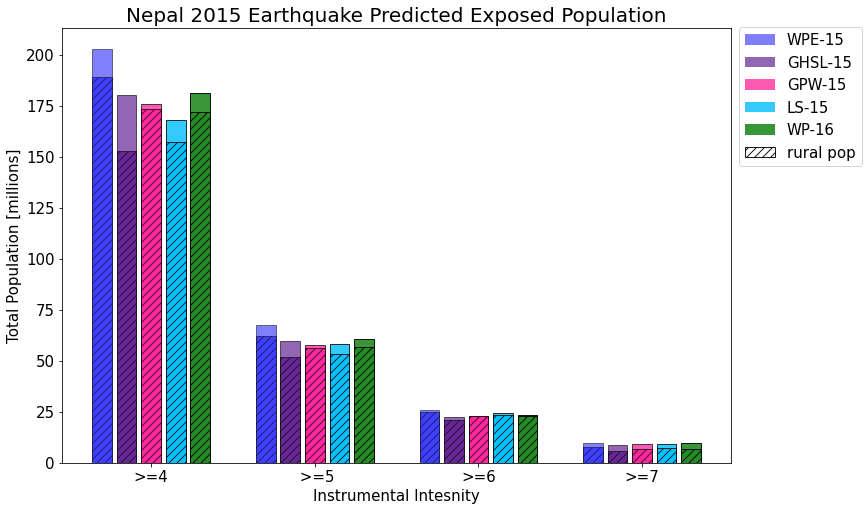

In [60]:
# Make bar plot 
fig, axs = plt.subplots(1, 1, figsize = (12, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)
scale = 10**6

# All Quake
data = group(npl_all)

# Bar locations
a = [1-.3,2-.3,3-.3, 4-.3]
b = [1-.15,2-.15,3-.15,4-.15]
c = [1,2,3,4]
d = [1+.15,2+.15,3+.15,4+.15]
e = [1+.3,2+.3,3+.3,4+.3]

# plots
plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black')
plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black')
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black')
plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black')
plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black')

# Fake plot for rural hatch legend 
# plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0, color = 'white', ec = 'black',hatch = "///")

# rural floods
data = group(npl_rural)
plt.bar(a, data.ESRI16_sum / scale, width=0.12, align='center', alpha  = 0.5, color = ESRI16_c, ec = 'black', hatch = "///")
plt.bar(b, data.GHS15_sum / scale, width=0.12, align='center', alpha  = 0.6, color = GHS15_c, ec = 'black', hatch = "///")
plt.bar(c, data.GPWv4_sum / scale, width=0.12, align='center', alpha  = 0.7, color = GPWv4_c, ec = 'black', hatch = "///")
plt.bar(d, data.LS15_sum / scale, width=0.12, align='center', alpha  = 0.8, color = LS15_c, ec = 'black', hatch = "///")
plt.bar(e, data.WP16_sum / scale, width=0.12, align='center', alpha  = 0.9, color = WP16_c, ec = 'black', hatch = "///")

# legend
legend_elements = [Patch(facecolor=ESRI16_c, alpha = 0.5, edgecolor=None, label='WPE-15'),
                  Patch(facecolor=GHS15_c, alpha = 0.6, edgecolor=None, label='GHSL-15'),
                  Patch(facecolor=GPWv4_c, alpha = 0.7, edgecolor=None, label='GPW-15'),
                  Patch(facecolor=LS15_c, alpha = 0.8, edgecolor=None, label='LS-15'),
                  Patch(facecolor= WP16_c, alpha = 0.9, edgecolor=None, label='WP-16'),
                  Patch(facecolor= 'white', alpha = 0.9,  hatch = '///', edgecolor='black', label='rural pop')]
plt.legend(handles = legend_elements, bbox_to_anchor=(1, 1.02), loc='upper left', ncol=1, fontsize = 15);

# Labels / Titles
axs.set_title('Nepal 2015 Earthquake Predicted Exposed Population', size = 20)  # <<<<<<<========== Change Country Here
axs.set_xlabel('Instrumental Intesnity', fontsize = 15)
axs.set_ylabel('Total Population [millions]', fontsize = 15)

# Ticks
ticks_bar = ['>=4', ' >=5', '>=6', '>=7'];
plt.xticks([1,2,3,4], ticks_bar, fontsize = 15);
plt.yticks(fontsize = 15);

# save it out
fig_out = DATA_PATH+'processed/Fig4.png'
# plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')